In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# GPU / MEM

In [34]:
folder = 'no_tensorrt'
file = 'gpu_mem'
yolov8n = pd.read_csv(f'{folder}/{file}_yolov8n.pt.csv')[0:300]
yolov8m = pd.read_csv(f'{folder}/{file}_yolov8m.pt.csv')[0:300]
yolov8s = pd.read_csv(f'{folder}/{file}_yolov8s.pt.csv')[0:300]
yolov9c = pd.read_csv(f'{folder}/{file}_yolov9c.pt.csv')[0:300]
rtdetrl = pd.read_csv(f'{folder}/{file}_rtdetr-l.pt.csv')[0:300]

In [35]:
yolov8n = yolov8n[0:300]

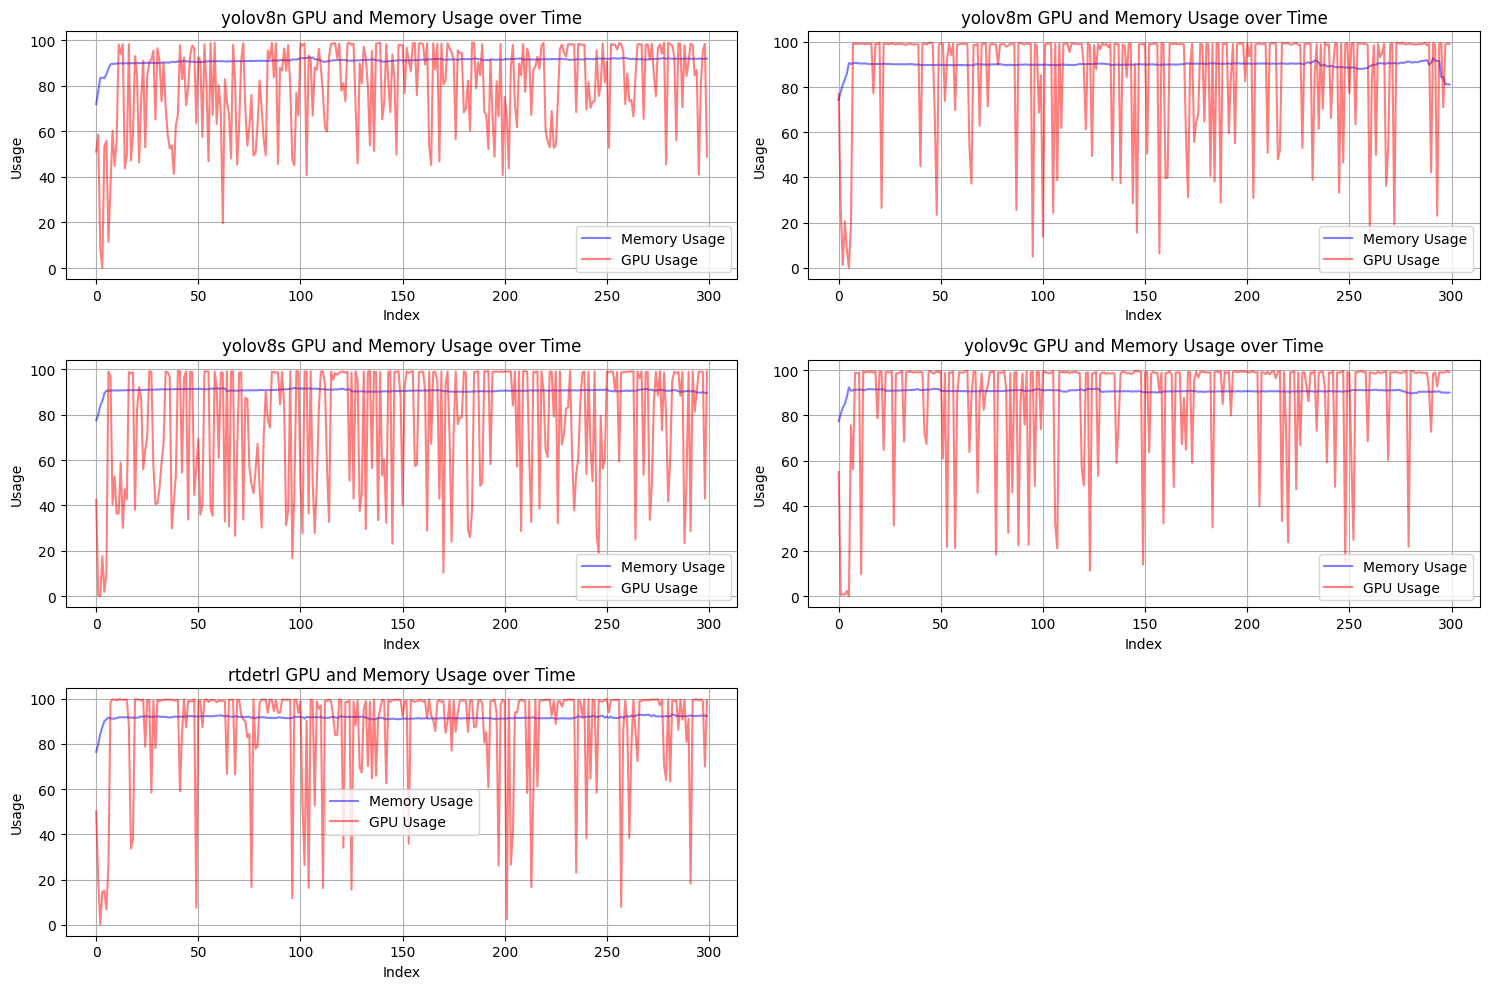

In [36]:

models = [yolov8n, yolov8m, yolov8s, yolov9c, rtdetrl]
model_names = ['yolov8n', 'yolov8m', 'yolov8s', 'yolov9c', 'rtdetrl']
# Plot GPU usage and memory usage for each model in subplots
plt.figure(figsize=(15, 10))
for i, model in enumerate(models, 1):
    plt.subplot(3, 2, i)
    plt.plot(model.index, model['mem_usage'], color='blue', label='Memory Usage', alpha=0.5)
    plt.plot(model.index, model['gpu_usage'], color='red', label='GPU Usage', alpha=0.5)
    plt.title(f'{model_names[i-1]} GPU and Memory Usage over Time')
    plt.xlabel('Index')
    plt.ylabel('Usage')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [37]:
# Merge DataFrames
merged_data = yolov8n.merge(yolov8m, on='number', suffixes=('_yolov8n', '_yolov8m')) \
                     .merge(yolov8s, on='number') \
                     .merge(yolov9c, on='number', suffixes=('_yolov8s', '_yolov9c')) \
                     .merge(rtdetrl, on='number', suffixes=('_yolov8s', '_rtdetrl'))
merged_data['gpu_usage_rtdetrl'] = merged_data['gpu_usage']
merged_data['mem_usage_rtdetrl'] = merged_data['mem_usage']
merged_data = merged_data.drop(['number', 'gpu_usage', 'mem_usage'], axis=1).copy()
merged_data = merged_data[0:300]

In [38]:
selected_columns = merged_data.filter(regex='^gpu_usage').columns
merged_data[selected_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
gpu_usage_yolov8n,300.0,79.623000,19.587645,0.1,66.900,85.85,97.725,98.9
gpu_usage_yolov8m,300.0,86.153333,24.892707,0.0,88.475,99.00,99.200,99.7
gpu_usage_yolov8s,300.0,75.122000,27.849963,0.0,50.825,90.85,98.900,99.3
gpu_usage_yolov9c,300.0,87.549000,24.207277,0.1,92.950,98.90,99.200,99.7
gpu_usage_rtdetrl,300.0,87.269333,23.549906,0.1,87.800,99.00,99.500,99.8


In [39]:
selected_columns = merged_data.filter(regex='^mem_usage').columns
merged_data[selected_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mem_usage_yolov8n,300.0,90.989590,1.725028,71.922509,90.752993,91.354937,91.684945,92.371541
mem_usage_yolov8m,300.0,89.825092,1.757635,74.402368,89.800975,90.096318,90.402028,92.885137
mem_usage_yolov8s,300.0,90.627640,1.166844,77.545336,90.454819,90.701578,91.028271,91.835716
mem_usage_yolov9c,300.0,90.739239,1.185840,77.400541,90.625328,90.759061,91.149435,92.433243
mem_usage_rtdetrl,300.0,91.663875,1.306762,76.510751,91.398750,91.776399,92.153326,93.011426


# FPS

In [40]:
file = 'fps'
yolov8n = pd.read_csv(f'{folder}/{file}_yolov8n.pt.csv')
yolov8m = pd.read_csv(f'{folder}/{file}_yolov8m.pt.csv')
yolov8s = pd.read_csv(f'{folder}/{file}_yolov8s.pt.csv')
yolov9c = pd.read_csv(f'{folder}/{file}_yolov9c.pt.csv')
rtdetrl = pd.read_csv(f'{folder}/{file}_rtdetr-l.pt.csv')

In [41]:
yolov9c

,no,fps
0,1,0.125769
1,2,8.019686
2,3,7.613148
3,4,7.597881
4,5,7.831023
...,...,...
367,368,7.816255
368,369,8.084174
369,370,7.960281
370,371,7.828013


In [42]:
# Merge DataFrames
merged_data = yolov8n.merge(yolov8m, on='no', suffixes=('_yolov8n', '_yolov8m')) \
                     .merge(yolov8s, on='no') \
                     .merge(yolov9c, on='no', suffixes=('_yolov8s', '_yolov9c')) \
                     .merge(rtdetrl, on='no', suffixes=('_yolov8s', '_rtdetrl'))
merged_data['fps_rtdetrl'] = merged_data['fps']
merged_data = merged_data.drop(['no', 'fps'], axis=1).copy()
merged_data = merged_data[0:300]

In [43]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fps_yolov8n,300.0,17.277513,5.431699,0.117913,13.237466,15.299519,21.947495,28.067373
fps_yolov8m,300.0,8.401104,2.036785,0.134427,6.786971,8.700298,10.347312,11.212618
fps_yolov8s,300.0,15.755631,3.769245,0.145776,13.676182,17.274907,18.671686,19.955581
fps_yolov9c,300.0,6.582867,1.525432,0.125769,5.457586,6.943330,7.945387,8.371029
fps_rtdetrl,300.0,3.310625,0.708002,0.120371,2.764311,3.491526,3.913410,4.208588


In [44]:
# # Specify the file path for the Excel file
# excel_file_path = 'merged_data_describe.xlsx'

# # Export the DataFrame to Excel
# merged_data_describe.to_excel(excel_file_path)

In [45]:
merged_data.mean(axis=0)

fps_yolov8n    17.277513
fps_yolov8m     8.401104
fps_yolov8s    15.755631
fps_yolov9c     6.582867
fps_rtdetrl     3.310625
dtype: float64

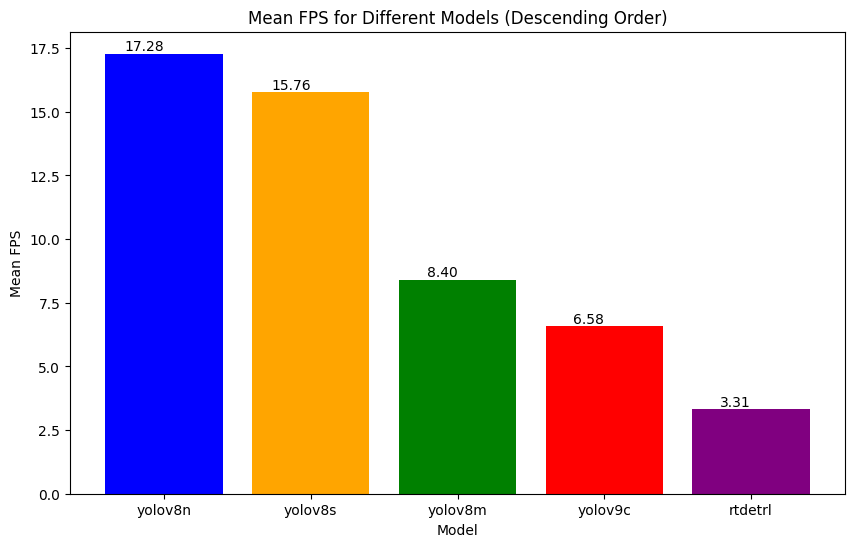

In [46]:
mean_fps = {
    'yolov8n': merged_data['fps_yolov8n'].mean(),
    'yolov8m': merged_data['fps_yolov8m'].mean(),
    'yolov8s': merged_data['fps_yolov8s'].mean(),
    'yolov9c': merged_data['fps_yolov9c'].mean(),
    'rtdetrl': merged_data['fps_rtdetrl'].mean()
}

# Sort mean FPS values in descending order
sorted_mean_fps = dict(sorted(mean_fps.items(), key=lambda item: item[1], reverse=True))

# Plot the mean FPS values
plt.figure(figsize=(10, 6))
plt.bar(sorted_mean_fps.keys(), sorted_mean_fps.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Mean FPS for Different Models (Descending Order)')
plt.xlabel('Model')
plt.ylabel('Mean FPS')
for xi, yi in zip(sorted_mean_fps.keys(), sorted_mean_fps.values()):
    plt.text(xi, yi, f'{yi:.2f}', ha='right', va='bottom')
plt.show()

# Latency

In [47]:
file = 'latency'
yolov8n = pd.read_csv(f'{folder}/{file}_yolov8n.pt_tensorrt.csv', header=None)
yolov8m = pd.read_csv(f'{folder}/{file}_yolov8m.pt_tensorrt.csv', header=None)
yolov8s = pd.read_csv(f'{folder}/{file}_yolov8s.pt_tensorrt.csv', header=None)
yolov9c = pd.read_csv(f'{folder}/{file}_yolov9c.pt_tensorrt.csv', header=None)
rtdetrl = pd.read_csv(f'{folder}/{file}_rtdetr-l.pt_tensorrt.csv', header=None)

In [48]:
rtdetrl.iloc[0, 0]

25.174675941467285

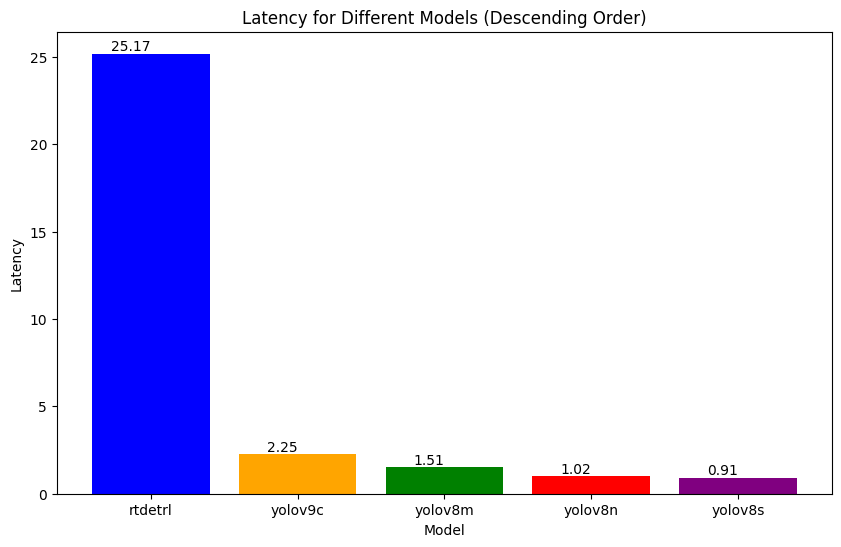

In [49]:
latency = {
    'yolov8n': yolov8n.iloc[0,0],
    'yolov8m': yolov8m.iloc[0,0],
    'yolov8s': yolov8s.iloc[0,0],
    'yolov9c': yolov9c.iloc[0,0],
    'rtdetrl': rtdetrl.iloc[0,0]
}

# Sort mean FPS values in descending order
sorted_latency = dict(sorted(latency.items(), key=lambda item: item[1], reverse=True))

# Plot the mean FPS values
plt.figure(figsize=(10, 6))
plt.bar(sorted_latency.keys(), sorted_latency.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Latency for Different Models (Descending Order)')
plt.xlabel('Model')
plt.ylabel('Latency')
# Add numbers on the plot
for xi, yi in zip(sorted_latency.keys(), sorted_latency.values()):
    plt.text(xi, yi, f'{yi:.2f}', ha='right', va='bottom')
plt.show()